<a href="https://colab.research.google.com/github/GustavoBD-Dev/neuronalnetworks/blob/main/DRARNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diagnóstico de Retinopatía Diabética Aplicando Redes Neuronales Convolucionales
Basado en un articulo obtenido de Medium.
Enlace: https://medium.com/data-science-bolivia/diagn%C3%B3stico-de-retinopat%C3%ADa-diab%C3%A9tica-aplicando-redes-neuronales-convolucionales-8dc8328c3ec3

##Keras, TensorFlow, Numpy, Pandas, matplotlib, sklearn, PIL y cv2 en Google Collab

In [1]:
# Importamos todas las librerias necesarias
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import adam_v2
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files # load file
from google.colab import drive # load files to Drive

##Analisis de los datos de Kaggle


La data de Kaggle proporciona un archivo los siguientes archivos:

1.   `trainLabels.csv`
2.   `resized_train`

Cargamos el archivo `csv` al programa para poder visualizar su contenido con la libreria pandas.

In [6]:
# Carga del archivo csv
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# los archivos que se cargan a collab se guardan en /content/

Saving trainLabels.csv to trainLabels.csv
User uploaded file "trainLabels.csv" with length 465317 bytes


In [7]:
# Lectura del archivo csv
data = pd.read_csv('/content/trainLabels.csv')
# Mostramos encabezado del archivo
data.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [8]:
# agregamos jpeg a cada fila de image para relacionarlo con las imagenes del datset
data['image_name'] = [i + '.jpeg' for i in data['image'].values]
data.head()

,image,level,image_name
0,10_left,0,10_left.jpeg
1,10_right,0,10_right.jpeg
2,13_left,0,13_left.jpeg
3,13_right,0,13_right.jpeg
4,15_left,1,15_left.jpeg


Podemos observar el que el archivo contiene el nombre de la imagen asi como el nivel de RD etiquetado. Para poder relacionarlo con las imagenes del dataset es necesario agregar la extención `.jpeg` a la columna `image`. Realizamos un conteo de cada una de las etiquetas de todo el archivo, mostramos en grafica el total de datos de cada nivel.

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

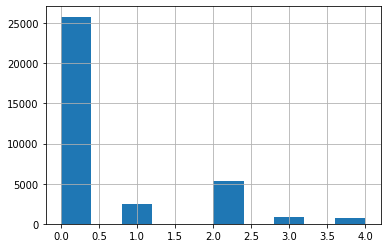

In [9]:
data['level'].hist()
data['level'].value_counts()